In [1]:
import main
import numpy as np

In [2]:
paths = ['Data/ydata']
main.read_news_data(paths)

4460598 events read with 55 articles
Skipped broken events: 221394


In [3]:
from mab import Egreedy, ThompsonSampling, Ucb1, LinUcb
from matplotlib import pyplot as plt

In [4]:
_ , res = main.run(Egreedy(0.1, main.arms_number))
rounds = res[-1]

Egreedy e=0.1
Execution time:  34.0s
CTR achieved:  0.0537


In [5]:
def plot_results(bandits):
    
    res_train = []
    res_test = []

    for b in bandits:
        train, test = main.run(b)
        train = train[1000:]
        if hasattr(b, 'e'):
            plt.plot(train, label="ε={}".format(b.e))
        else:
            plt.plot(train, label="α={}".format(b.alpha))
        
        res_train.append(train[-1]/rounds)   
        res_test.append(test[-1]/rounds) 

    plt.title("Training")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    
    if hasattr(b, 'e'):
        param_values = [round(x.e, 2) for x in bandits]
        plt.xlabel("ε")
    else:
        param_values = [round(x.alpha, 2) for x in bandits]
        plt.xlabel("α")
    plt.plot(param_values, res_train, marker='o')
    plt.title('Training')
    plt.ylabel("CTR lift")
    plt.show()


    if hasattr(b, 'e'):
        plt.xlabel("ε")
    else:
        plt.xlabel("α")
    plt.ylabel("CTR lift")
    plt.plot(param_values, res_test, marker='o')
    plt.title('Testing')
    plt.show()

    best_idx = np.argmax(res_test)
    print('Best parameter: ',bandits[best_idx].name)

Egreedy e=0.01
Execution time:  39.3s
CTR achieved:  0.0607
Egreedy e=0.05
Execution time:  38.3s
CTR achieved:  0.0586
Egreedy e=0.1
Execution time:  38.5s
CTR achieved:  0.06
Egreedy e=0.2
Execution time:  36.0s
CTR achieved:  0.051
Egreedy e=0.3
Execution time:  34.3s
CTR achieved:  0.0581
Egreedy e=0.4
Execution time:  33.5s
CTR achieved:  0.0524
Egreedy e=0.5
Execution time:  31.1s
CTR achieved:  0.0523
Egreedy e=0.6
Execution time:  31.0s
CTR achieved:  0.051
Egreedy e=0.7
Execution time:  28.1s
CTR achieved:  0.0481
Egreedy e=0.8
Execution time:  25.4s
CTR achieved:  0.0473
Egreedy e=0.9
Execution time:  22.7s
CTR achieved:  0.0452


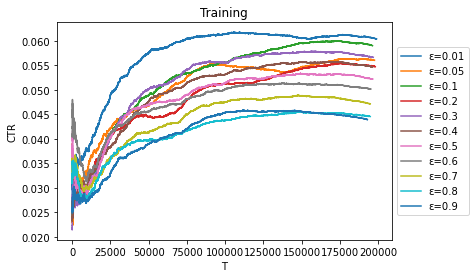

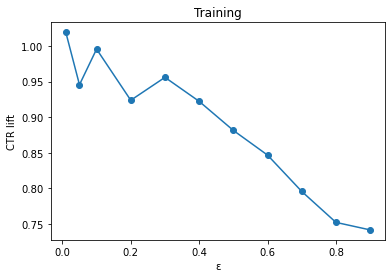

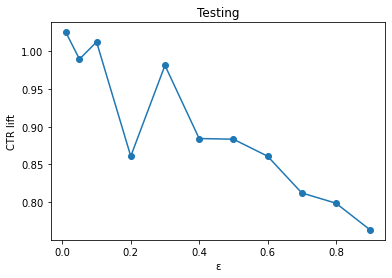

Best parameter:  Egreedy e=0.01


In [6]:
epsilon_values = [0.01, 0.05]
epsilon_values = np.concatenate([epsilon_values,np.arange(0.1,1,0.1)])
epsilon_value = [round(e, 2) for e in epsilon_values]
bandits = [Egreedy(e, main.arms_number) for e in epsilon_value]
plot_results(bandits)

UCB1 α=0.01
Execution time:  1.3m
CTR achieved:  0.0604
UCB1 α=0.05
Execution time:  1.3m
CTR achieved:  0.0572
UCB1 α=0.1
Execution time:  1.3m
CTR achieved:  0.0563
UCB1 α=0.3
Execution time:  1.3m
CTR achieved:  0.05
UCB1 α=0.5
Execution time:  1.3m
CTR achieved:  0.0487
UCB1 α=0.7
Execution time:  1.3m
CTR achieved:  0.0469
UCB1 α=0.9
Execution time:  1.4m
CTR achieved:  0.0439
UCB1 α=1.1
Execution time:  1.3m
CTR achieved:  0.0459


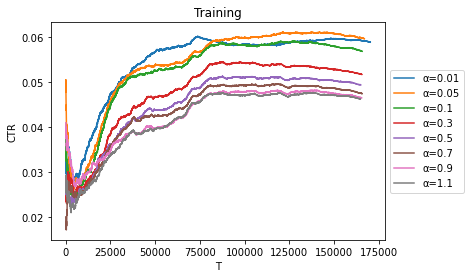

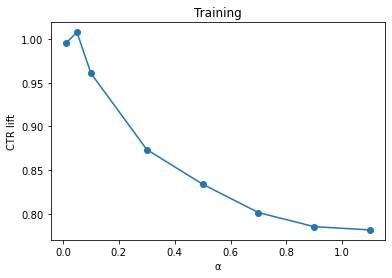

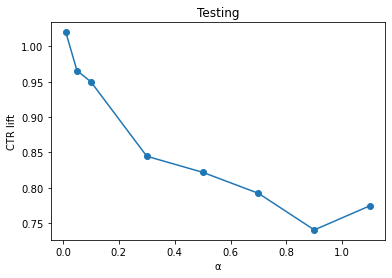

Best parameter:  UCB1 α=0.01


In [7]:
alpha_values = [0.01, 0.05]
alpha_values = np.concatenate([alpha_values, np.arange(0.1,1.2,0.2)])
alpha_value = [round(e, 2) for e in alpha_values]
tests = [Ucb1(a, main.arms_number) for a in alpha_value]
plot_results(tests)

LinUcb alpha=0.01
Execution time:  101.8m
CTR achieved:  0.0417
LinUcb alpha=0.05
Execution time:  104.8m
CTR achieved:  0.0655
LinUcb alpha=0.1
Execution time:  110.3m
CTR achieved:  0.062
LinUcb alpha=0.3
Execution time:  105.2m
CTR achieved:  0.0682
LinUcb alpha=0.5
Execution time:  102.0m
CTR achieved:  0.0657
LinUcb alpha=0.7
Execution time:  102.5m
CTR achieved:  0.0634
LinUcb alpha=0.9
Execution time:  101.9m
CTR achieved:  0.0619
LinUcb alpha=1.1
Execution time:  101.8m
CTR achieved:  0.0599


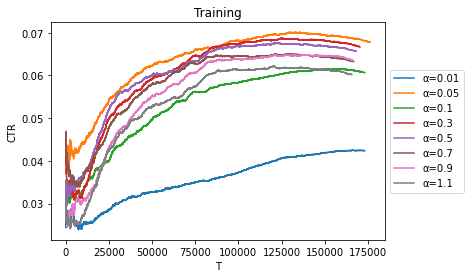

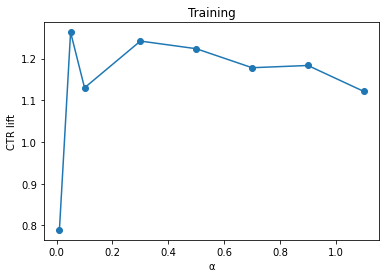

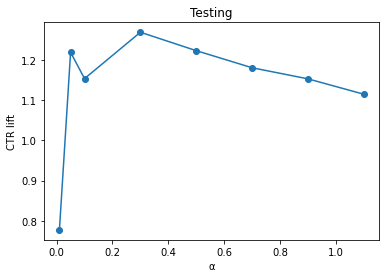

Best parameter:  LinUcb alpha=0.3


In [6]:
alpha_values = [0.01, 0.05]
alpha_values = np.concatenate([alpha_values, np.arange(0.1,1.2,0.2)])
alpha_value = [round(e, 2) for e in alpha_values]
tests = [LinUcb(a, main.arms_number) for a in alpha_value]
plot_results(tests)